In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import altair as alt
import geopandas as gpd
from vega_datasets import data
from altair_transform import extract_data

from scipy.stats import chi2_contingency, f_oneway, ttest_ind, logistic


In [2]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20241120.csv")
df.shape

C:\Users\naikd\AppData\Local\Temp\ipykernel_21036\2843587125.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20241120.csv")


(2135627, 29)

In [4]:
print(df.head())

   CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1             

In [ ]:
print(df.describe(include='all'))


        CRASH DATE CRASH TIME   BOROUGH   ZIP CODE      LATITUDE  \
count      2135627    2135627   1472224  1471962.0  1.896223e+06   
unique        4522       1440         5      426.0           NaN   
top     01/21/2014      16:00  BROOKLYN    11207.0           NaN   
freq          1161      28953    469544    21792.0           NaN   
mean           NaN        NaN       NaN        NaN  4.062512e+01   
std            NaN        NaN       NaN        NaN  2.006017e+00   
min            NaN        NaN       NaN        NaN  0.000000e+00   
25%            NaN        NaN       NaN        NaN  4.066761e+01   
50%            NaN        NaN       NaN        NaN  4.072060e+01   
75%            NaN        NaN       NaN        NaN  4.076963e+01   
max            NaN        NaN       NaN        NaN  4.334444e+01   

           LONGITUDE    LOCATION                    ON STREET NAME  \
count   1.896223e+06     1896223                           1677815   
unique           NaN      295569           

In [ ]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135627 entries, 0 to 2135626
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [ ]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.896223e+06,1.896223e+06,2.135609e+06,2.135596e+06,2.135627e+06,2.135627e+06,2.135627e+06,2.135627e+06,2.135627e+06,2.135627e+06,2.135627e+06
mean,4.062512e+01,-7.374740e+01,3.181256e-01,1.539149e-03,5.768048e-02,7.590277e-04,2.786910e-02,1.208076e-04,2.284182e-01,6.349423e-04,3.204234e+06
std,2.006017e+00,3.764201e+00,7.070975e-01,4.142045e-02,2.462845e-01,2.811214e-02,1.667121e-01,1.103311e-02,6.683169e-01,2.756863e-02,1.506726e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066761e+01,-7.397471e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.170026e+06
50%,4.072060e+01,-7.392710e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.704074e+06
75%,4.076963e+01,-7.386678e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.238216e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.772425e+06


Geospatial Crash Heatmap

In [ ]:
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
df = df[(df['LATITUDE'] != 0) & (df['LONGITUDE'] != 0)]  # Remove invalid coordinates

# Extract crash locations as a list of tuples
locations = df[['LATITUDE', 'LONGITUDE']].values.tolist()

# Create a Folium Map centered on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add HeatMap layer
HeatMap(locations).add_to(nyc_map)

# Save and display the map
nyc_map.save("nyc_crash_heatmap.html")


In [ ]:
sample_size = 1000  # Adjust this number as needed
data_sample = df.sample(n=sample_size, random_state=1)


In [ ]:
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add markers to the map
for _, row in data_sample.iterrows():
    crash_info = f"""
    <b>Date:</b> {row['CRASH DATE']}<br>
    <b>Time:</b> {row['CRASH TIME']}<br>
    <b>Borough:</b> {row['BOROUGH']}<br>
    <b>Injuries:</b> {row['NUMBER OF PERSONS INJURED']}<br>
    <b>Fatalities:</b> {row['NUMBER OF PERSONS KILLED']}<br>
    <b>Contributing Factor:</b> {row['CONTRIBUTING FACTOR VEHICLE 1']}
    """
    icon_color = 'red' if row['NUMBER OF PERSONS KILLED'] > 0 else 'orange'
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=folium.Popup(crash_info, max_width=300),
        icon=folium.Icon(, prefix="fa", color=icon_color)
    ).add_to(nyc_map)

# Save the map to an HTML file
nyc_map.save("nyc_crash_markers_map.html")


In [ ]:
# Filter data with valid latitude and longitude
df_geo = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a base map centered on the average location
map_center = [df_geo['LATITUDE'].mean(), df_geo['LONGITUDE'].mean()]
base_map = folium.Map(location=map_center, zoom_start=11)

# Prepare data for the HeatMap
heat_data = df_geo[['LATITUDE', 'LONGITUDE']].values.tolist()

# Add the HeatMap layer to the base map
HeatMap(heat_data, radius=8, max_zoom=13).add_to(base_map)

# Save the map to an HTML file
base_map.save('collision_heatmap.html')


In [ ]:
df['CRASH_DATETIME'] = pd.to_datetime(df['CRASH DATE'] + ' ' + df['CRASH TIME'], errors='coerce')


C:\Users\naikd\AppData\Local\Temp\ipykernel_19204\994208596.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=factor_counts.index, x=factor_counts.values, palette='viridis')


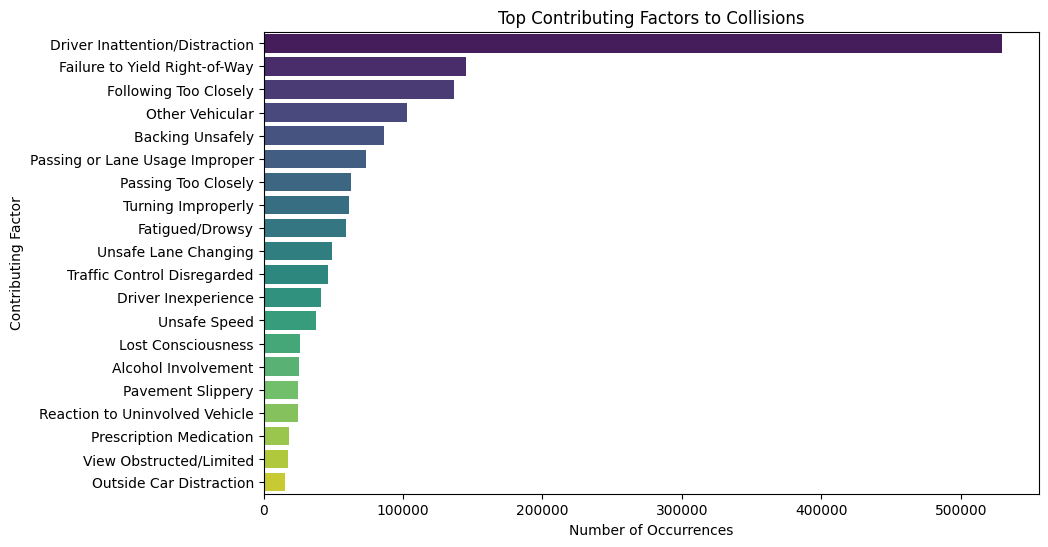

In [ ]:
# Combine contributing factors into a single series
factors = pd.concat([df['CONTRIBUTING FACTOR VEHICLE 1'],
                     df['CONTRIBUTING FACTOR VEHICLE 2'],
                     df['CONTRIBUTING FACTOR VEHICLE 3'],
                     df['CONTRIBUTING FACTOR VEHICLE 4'],
                     df['CONTRIBUTING FACTOR VEHICLE 5']])

# Count the occurrences of each factor
factor_counts = factors.value_counts().drop('Unspecified', errors='ignore').head(20)

# Plot the top contributing factors
plt.figure(figsize=(10,6))
sns.barplot(y=factor_counts.index, x=factor_counts.values, palette='viridis')
plt.title('Top Contributing Factors to Collisions')
plt.xlabel('Number of Occurrences')
plt.ylabel('Contributing Factor')
plt.show()


C:\Users\naikd\AppData\Local\Temp\ipykernel_19204\655613398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=vehicle_counts.index, x=vehicle_counts.values, palette='magma')


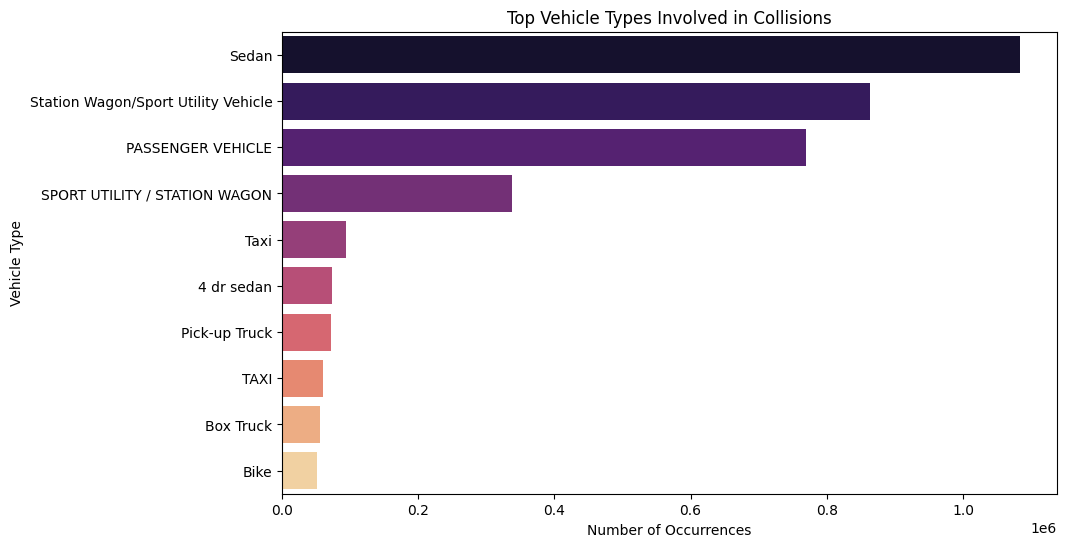

In [ ]:
# Combine vehicle types into a single series
vehicles = pd.concat([df['VEHICLE TYPE CODE 1'],
                      df['VEHICLE TYPE CODE 2'],
                      df['VEHICLE TYPE CODE 3'],
                      df['VEHICLE TYPE CODE 4'],
                      df['VEHICLE TYPE CODE 5']])

# Count occurrences of each vehicle type
vehicle_counts = vehicles.value_counts().drop('UNKNOWN', errors='ignore').head(10)

# Plot the vehicle types
plt.figure(figsize=(10,6))
sns.barplot(y=vehicle_counts.index, x=vehicle_counts.values, palette='magma')
plt.title('Top Vehicle Types Involved in Collisions')
plt.xlabel('Number of Occurrences')
plt.ylabel('Vehicle Type')
plt.show()


In [ ]:
# Resample data to get daily collision counts
df_timeseries = df.set_index('CRASH_DATETIME').resample('D').size().reset_index(name='Collisions')

# Create Altair line chart
timeseries_chart = alt.Chart(df_timeseries).mark_line().encode(
    x='CRASH_DATETIME:T',
    y='Collisions:Q',
    tooltip=['CRASH_DATETIME', 'Collisions']
).properties(
    width=800,
    height=400,
    title='Daily Collisions Over Time'
).interactive()

timeseries_chart


alt.Chart(...)

In [ ]:
# Sum up injuries and fatalities by type
injuries = df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']].sum()
fatalities = df[['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']].sum()

# Prepare data for plotting
injury_data = pd.DataFrame({
    'Category': ['Pedestrians', 'Cyclists', 'Motorists'],
    'Injuries': injuries.values,
    'Fatalities': fatalities.values
})

injury_data_melted = injury_data.melt(id_vars='Category', var_name='Type', value_name='Count')

# Create Altair bar chart
injury_chart = alt.Chart(injury_data_melted).mark_bar().encode(
    x='Category:N',
    y='Count:Q',
    color='Type:N',
    tooltip=['Category', 'Type', 'Count']
).properties(
    width=400,
    height=300,
    title='Injuries and Fatalities by Category'
)

injury_chart


alt.Chart(...)

In [ ]:
# Combine vehicle types into a single series
vehicles = pd.concat([
    df['VEHICLE TYPE CODE 1'],
    df['VEHICLE TYPE CODE 2'],
    df['VEHICLE TYPE CODE 3'],
    df['VEHICLE TYPE CODE 4'],
    df['VEHICLE TYPE CODE 5']
])

# Count occurrences of each vehicle type
vehicle_counts = vehicles.value_counts().drop(['UNKNOWN', 'Other'], errors='ignore').head(10).reset_index()
vehicle_counts.columns = ['Vehicle Type', 'Count']

# Create Altair bar chart
vehicle_chart = alt.Chart(vehicle_counts).mark_bar().encode(
    x='Count:Q',
    y=alt.Y('Vehicle Type:N', sort='-x'),
    tooltip=['Vehicle Type', 'Count']
).properties(
    width=600,
    height=400,
    title='Top Vehicle Types Involved in Collisions'
)

vehicle_chart


alt.Chart(...)

Temporal Heat Map (Calendar View) : Identifying the peak times to recognize when the collisions are likely to occur

In [ ]:
# Extract hour and day of the week
df['Hour'] = df['CRASH_DATETIME'].dt.hour
df['DayOfWeek'] = df['CRASH_DATETIME'].dt.day_name()

# Create a pivot table
heatmap_data = df.groupby(['Hour', 'DayOfWeek']).size().reset_index(name='Collisions')

# Order days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data['DayOfWeek'] = pd.Categorical(heatmap_data['DayOfWeek'], categories=day_order, ordered=True)

# Create Altair heat map
heatmap_chart = alt.Chart(heatmap_data).mark_rect().encode(
    x=alt.X('DayOfWeek:N', title='Day of Week'),
    y=alt.Y('Hour:O', title='Hour of Day'),
    color=alt.Color('Collisions:Q', scale=alt.Scale(scheme='inferno')),
    tooltip=['DayOfWeek', 'Hour', 'Collisions']
).properties(
    width=500,
    height=300,
    title='Collisions Heatmap by Day and Hour'
)

heatmap_chart


alt.Chart(...)

In [ ]:
# Aggregate data by borough
borough_data = df.groupby('BOROUGH').agg({
    'COLLISION_ID': 'count',
    'NUMBER OF PERSONS INJURED': 'sum',
    'NUMBER OF PERSONS KILLED': 'sum',
    'NUMBER OF PEDESTRIANS INJURED': 'sum',
    'NUMBER OF CYCLIST INJURED': 'sum',
    'NUMBER OF MOTORIST INJURED': 'sum'
}).reset_index()

# Rename columns for clarity
borough_data.rename(columns={
    'COLLISION_ID': 'Total Collisions',
    'NUMBER OF PERSONS INJURED': 'Total Injuries',
    'NUMBER OF PERSONS KILLED': 'Total Fatalities',
    'NUMBER OF PEDESTRIANS INJURED': 'Total Pedestrians Injured'
}, inplace=True)

# Calculate average injuries per collision
borough_data['Avg Injuries per Collision'] = borough_data['Total Injuries'] / borough_data['Total Collisions']

# Calculate average pedestrians injured per collision
borough_data['Avg Pedestrians Injured per Collision'] = borough_data['Total Pedestrians Injured'] / borough_data['Total Collisions']

# Handle potential division by zero
borough_data.fillna(0, inplace=True)


In [ ]:
# Ensure numeric data types for injury and fatality columns
injury_cols = [
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'
]

for col in injury_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Create a 'Severity' column (e.g., total injuries and fatalities)
df['Severity'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']
